# **K-means**
- Common clustering technique, helps to solve many problems efficiently.
- one of the simplest and popular unsupervised machine learning algorithms.
- unsupervised algorithms means that our datasets using only input vectors(X) without referring to labelled, outcomes(Y).
-a common technique for statistical data analysis
## **The objective of K-means is simple:**
### Group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster,The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


# **Problem:** 
### We are opening a Cake Shops and we have list of locations of BUYERS who frequently order Cake we want to find out optimal locations of Cake Shops where they should be opened?
(just taking example)

![cake_meme](https://user-images.githubusercontent.com/42711978/87532315-908e2580-c6b0-11ea-8eff-01000290d667.jpg)


# Step-1 : Initialise Cake Shops randomly.

![img2133](https://user-images.githubusercontent.com/42711978/87532558-f7abda00-c6b0-11ea-9f0c-f5730efa1eca.png)


# Step-2 : Assign each Buyer to its nearest Cake Shop.

![img2](https://user-images.githubusercontent.com/42711978/87532632-1316e500-c6b1-11ea-9b78-64e16a818b60.png)


# Step-3 : Update the Shop Location by taking mean of Buyers assigned to it.

![img21](https://user-images.githubusercontent.com/42711978/87532691-29bd3c00-c6b1-11ea-8b03-ba6aef024807.png)


# Step-4 : Repeat Steps 2 and 3 Until Convergence.

![img213](https://user-images.githubusercontent.com/42711978/87532792-48233780-c6b1-11ea-9cf9-be5acc7f2de2.png)


## **How the K-means algorithm works?**



To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

**1. Cluster assignment**<br>
the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the cluster centroids.<br>
**2. Updation centroid**<br>
K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.
This process is repeated until there is no change in the clusters. K is chosen randomly or by giving specific initial starting points by the us.


![img](https://user-images.githubusercontent.com/42711978/87543560-97be2f00-c6c2-11ea-8ab3-f7fd89605cfb.png)
⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️
![SegmentLocal](https://user-images.githubusercontent.com/42711978/87918133-9e1e2380-ca93-11ea-9237-bbe5ef68c084.gif "segment")


### **Cluster Quality**
Our goal here is not just to make many clusters but to make the most meaningful clusters. We can measure the quality of clusters using a metric called Interia.
       
* **Inertia** is the average distortion of the clusters. \n",
* **Distortion** is calculated at the cluster level. For each cluster, it calculates the sum of squared \"error\" where error is considered as the distance of a every datapoint from its cluster centroid.

Think about this, if we have 500 data-points, the model can create 500 clusters, thus making distortion zero and the \"best quality\". Measuring the performance just based on distortion is not good enough. Therefore, picking 'k' is a very important step in building a clustering model.


### **How do we choose 'k'?**

A fundamental step for any clustering algorithm is to determine the optimal number of clusters (k) into which the data may be clustered.
       
![](https://user-images.githubusercontent.com/42711978/87970313-2c6cc680-cae1-11ea-865b-a775d7d06ec1.png)

**WCSS** is an ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The objective is to minimise this value.
        ![](https://www.researchgate.net/profile/Chirag_Deb/publication/320986519/figure/fig8/AS:560163938422791@1510564898246/Result-of-the-elbow-method-to-determine-optimum-number-of-clusters.png)<br>
The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and records the avearage distortion for each of these k values. We expect this graph to produce a long-tail (as we increase the clusters, the distortions will reduce) and the goal is to identify the \"elbow\" which optimizes the number of clusters without overfitting.

## Implement K-Means Algorithm

#### Dataset
Make_blobs in sklearn is a nice functionaity which gives us a way to create synthetic grouped datapoints which serve as very good datasets to visualize clustering algorithms.

#### Algorithm
The main goal of this section is to write out the algorithm for K-Means Clustering without the use of external ML packages and to understand each step that is performed.

#### Objective
Running this code on our synthetic dataset will allow us to understand how the model iteratively clusters.

In [9]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
#Number of Centroids
k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

#Creates a list of lists (A of B) where length of A is 500, lengths of all B is 2, centers is the number of clusters 
X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)

#If you want to generate a correspoding y vector too, uncomment the below statement and run this cell
#X,y =make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)

#Sample the shape to know how many (rows,columns) are present in your synthetic dataset
#This dataset has 2 columns which are "x coordinate" and "y coordinate" and each row is a datapoint
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


In [11]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary 

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
          
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        
        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so
        
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [14]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        
        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

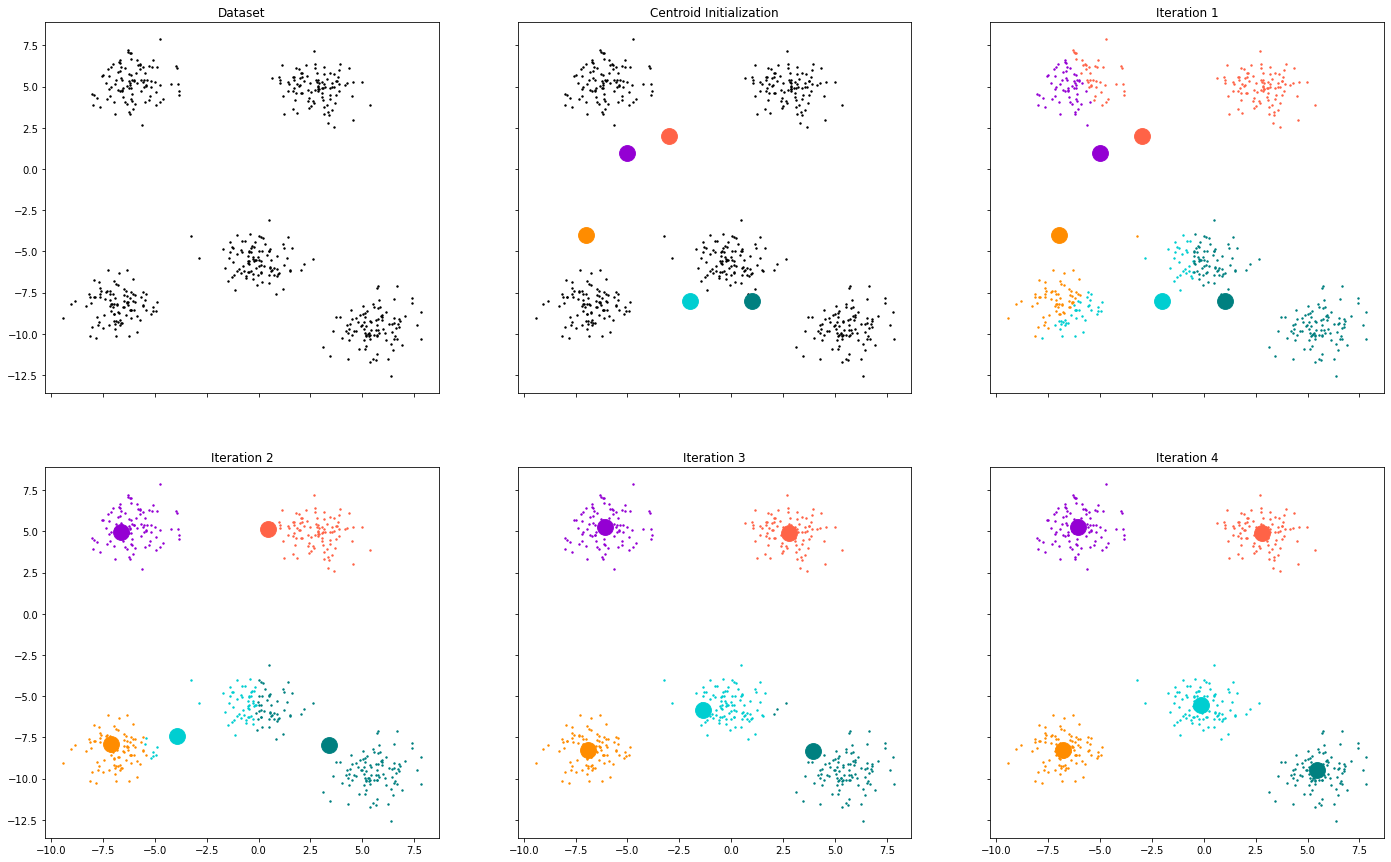

In [16]:
#Lets create a 6 panel plot showing how the cluster centroids evolve with each iteration
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(24, 15)

#DATAPOINTS
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

#CENTROID INITIALIZATION
#Lets call our function that intializes the centroids
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Using KMeans++ from sklearn


In [17]:
from sklearn.cluster import KMeans
#Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(n_clusters=5)

INERTIA = 872.8554968701878
ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[ 2.78561142  4.93182424]
 [-0.06909909 -5.56399319]
 [-6.06533341  5.2400571 ]
 [-6.78567723 -8.26282547]
 [ 5.56873506 -9.60861515]]



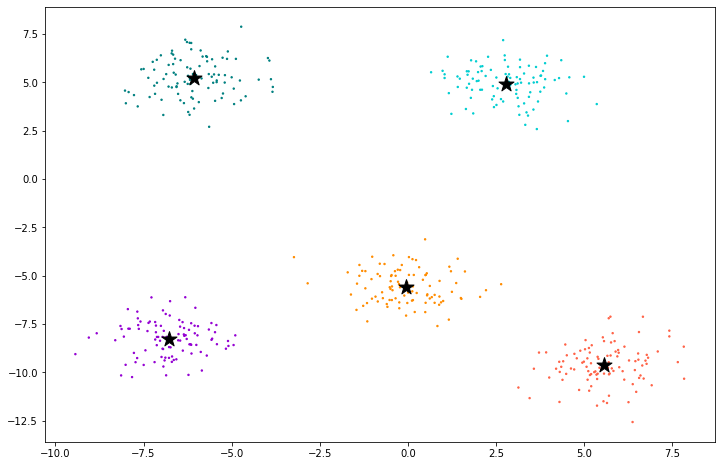

In [18]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

In [20]:
#Let us try this out without defining the cluster counts and see what the optimal number of clusters are
kmeans_demo2 = KMeans() #What if we dont initialize the number of clusters?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo2.fit(X)

KMeans()

INERTIA = 676.561102778494
ITERATIONS TO CONVERGE = 8
CLUSTER CENTROIDS = 
[[  2.78561142   4.93182424]
 [ -0.68750373  -5.28678267]
 [ -6.77302495   4.6318491 ]
 [ -6.78567723  -8.26282547]
 [  6.321178    -8.97875638]
 [ -5.53146084   5.69888068]
 [  0.75064659  -5.9314583 ]
 [  5.02386258 -10.06471977]]



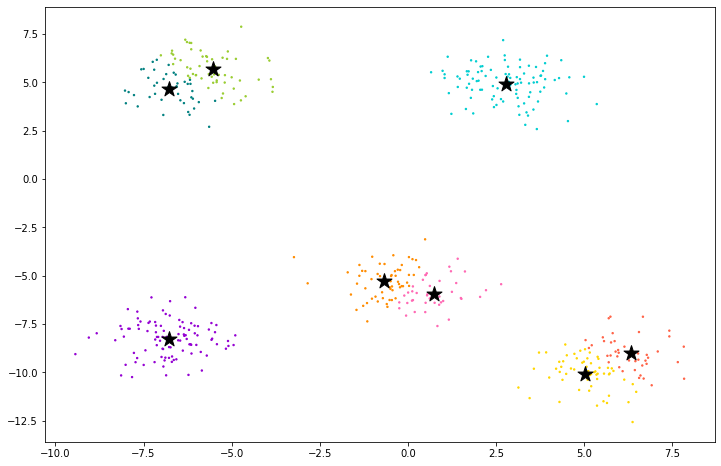

In [21]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo2.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo2.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo2.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo2.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo2.cluster_centers_[:,0], kmeans_demo2.cluster_centers_[:,1], c = 'black', s=250, marker = "*")
plt.gcf().set_size_inches(12,8)
plt.show()

Thats interesting! Even though the data visually has 5 clusters, KMeans has found 8 to be the optimal number of clusters!

# Application :-

## Clustering with Images
If you are given an image, can you use clustering to build any cool image applications?

### Image Compression

An image is made of pixels and each pixel has a colour associated with it. Every colour can be represented in a numeric scale. High resolution images are rich in numerical pixel data and are thus heavy. If you were to "compress" the image, the easiest thing to do would be to reduce the number of colours being represented by the image.

Say you are given an image, and it visually has 5 main sections/colors. Can you cluster each pixel into one of these 5 sections/colors and recolour

In [22]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
image_location = 'https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg'

Image shape = (1200, 1600, 3)


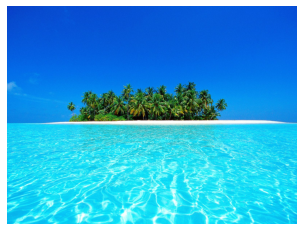

Total Pixels = 1920000
Data Sample: 


array([[  3,  57, 192],
       [  9,  63, 198],
       [ 12,  66, 201]], dtype=uint8)

In [24]:
image = io.imread(image_location)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN 
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

**Optimal value for k:**  Since this image has 3 main sections (sky, forest and sea) we can set k = 3 so the points are clustered to be one of these sections. Try out different values to see how the image representation changes!

CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


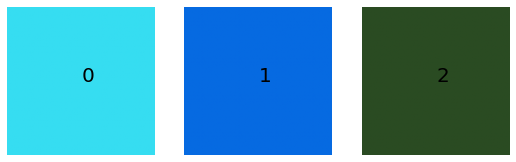

In [26]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint") 

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [27]:
#The predictions of the cluster number for each pixels
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [28]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

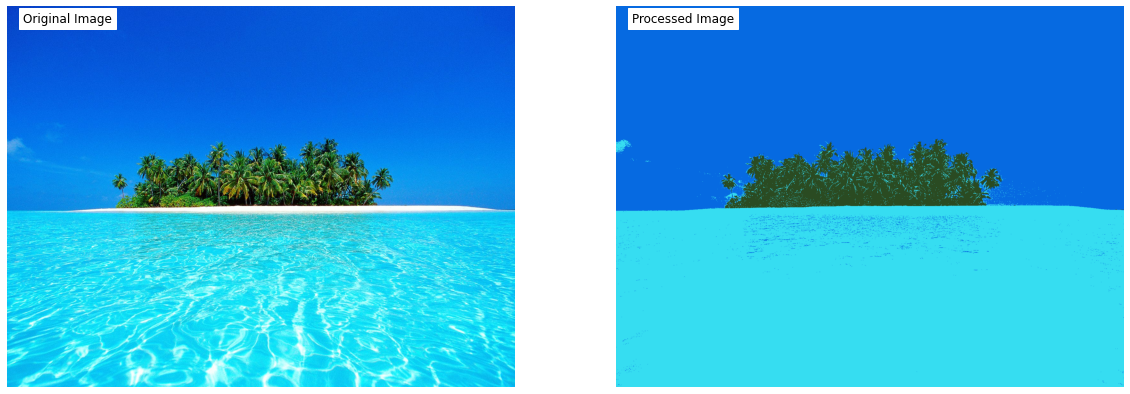

In [29]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()


We can keep all are images in folder and do Image compression on them

In [67]:
#Importing Libraries
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [68]:
plt.rcParams['figure.figsize'] = (20, 12)

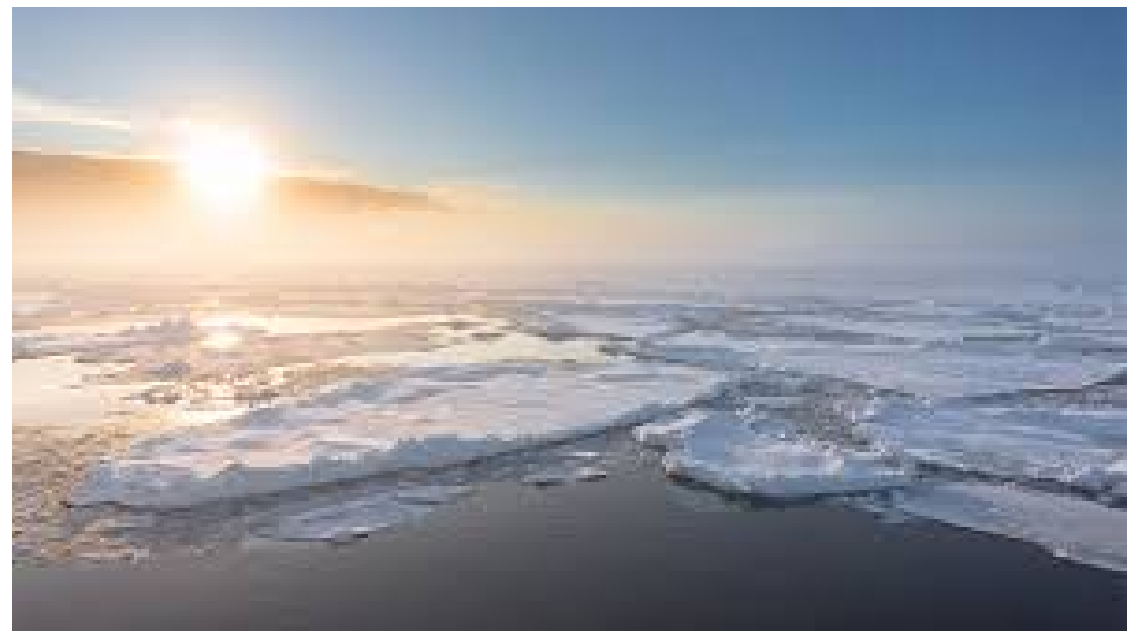

In [77]:
#Data Preprocessing
img = io.imread('images/11-ICE.jpg')
ax = plt.axes(xticks=[], yticks=[])
img_data = (img / 255.0).reshape(-1, 3)
ax.imshow(img)

In [71]:
from plot_utils import plot_utils

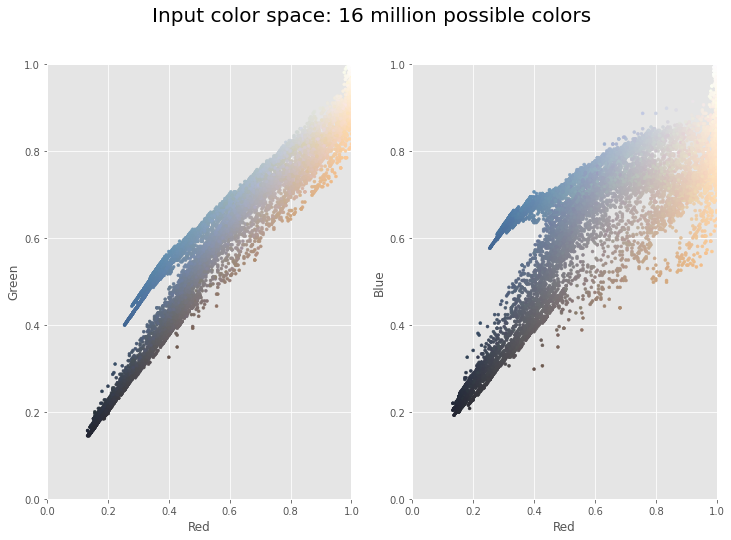

In [72]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors')
x.colorSpace()
#so their is sharp transition from one color space to other so we have to make it segmented transition 
#it has very smooth gradient

In [73]:
from sklearn.cluster import MiniBatchKMeans
#high resolution images ==MiniBatchKMeans==>small batches 

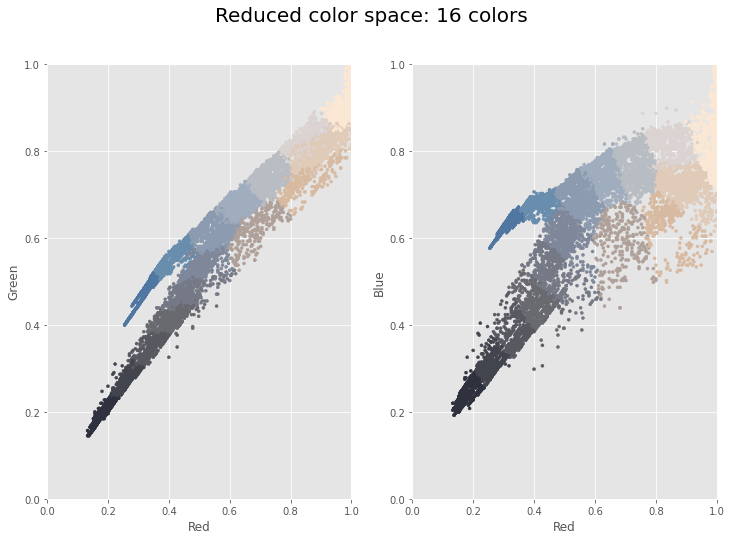

In [74]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)] #here we are predicting 16 colors on the img 

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

### K-means Image Compression with Interactive Controls

In [75]:
img_dir = 'images/'
#adding dropdown menu and a slider using Ipythonwidgets
#https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [76]:
@interact #decorater 
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    #continuous_update will be false so only update when we realease the slider
    #width here is sliderlayout 
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)#this show 1 row but 2 col means one row has 2 images
    fig.suptitle('K-means Clustering (Dominant colors Extraction)', fontsize=50)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '10-Sunset.jpg', …

**TRY THIS OUT!**

- Increase the value of k to see how you can represent the least resolution and best quality version of your image.
- Try out different images to explore this cool feature.
- Think of ways to optimally decide k without manual intervention
- Are there other applications other than compression? (hint: filters)